# Библиотеки

In [103]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pickle

# Генерация тренировочных данных

In [104]:
train_x = np.linspace(0, 5, 100)
train_y = train_x + np.random.random(100)*2-1

Посмотрим на данные

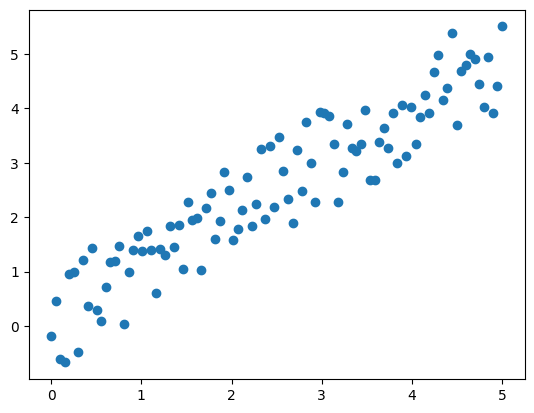

In [105]:
plt.scatter(train_x, train_y)
plt.show()

# Обучение модели линейной регрессии

In [106]:
train_x = train_x.reshape(-1,1)
train_y = train_y.reshape(-1,1)
reg = LinearRegression().fit(train_x, train_y)
reg.score(train_x, train_y)

0.863023658546789

Cохраним модель в файл

In [107]:
filename = 'model.sav'
pickle.dump(reg, open(filename, 'wb'))

# Тестирование обученной модели с помощью pytest

In [109]:
%%writefile test.py
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression

# Загрузка обученной модели
filename = 'model.sav'
model = pickle.load(open(filename, 'rb'))

def test_one():
  # Первый тестовый набор данных
  test_x_1 = np.linspace(0, 15, 100)
  test_y_1 = test_x_1 + np.random.random(100)*3-2
  test_x_1 = test_x_1.reshape(-1,1)
  test_y_1 = test_y_1.reshape(-1,1)
  assert model.score(test_x_1, test_y_1) > 0.5, "Низкий уровень предсказания!"

def test_two():
  # Второй тестовый набор данных
  test_x_2 = np.linspace(0, 10, 100)
  test_y_2 = test_x_2 + np.random.random(100)*4-3
  test_x_2 = test_x_2.reshape(-1,1)
  test_y_2 = test_y_2.reshape(-1,1)
  assert model.score(test_x_2, test_y_2) > 0.5, "Низкий уровень предсказания!"

def test_three():
  # Шумовой набор данных
  noise_data_x = np.linspace(0, 15, 100)
  noise_data_y = noise_data_x + np.random.random(100)*3-1
  noise_data_y[25:45] *= -2
  noise_data_x = noise_data_x.reshape(-1,1)
  noise_data_y = noise_data_y.reshape(-1,1)
  assert model.score(noise_data_x, noise_data_y) > 0.5, "Низкий уровень предсказания!"


Overwriting test.py


In [110]:
!pytest test.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.0, pluggy-1.2.0
rootdir: /content
plugins: anyio-3.7.1
collected 3 items                                                              

test.py ..F                                                              [100%]

=================================== FAILURES ===================================
__________________________________ test_three __________________________________

    def test_three():
      # Шумовой набор данных
      noise_data_x = np.linspace(0, 15, 100)
      noise_data_y = noise_data_x + np.random.random(100)*3-1
      noise_data_y[25:45] *= -2
      noise_data_x = noise_data_x.reshape(-1,1)
      noise_data_y = noise_data_y.reshape(-1,1)
>     assert model.score(noise_data_x, noise_data_y) > 0.5, "Низкий уровень предсказания!"
E     AssertionError: Низкий уровень предсказания!
E     assert 0.31183572137518556 > 0.5
E      +  where 0.311835721

Третий тест с шумовыми данными провалился, в данном случае уровень предсказания был ниже установленной нормы.